Passo 1: Carichiamo e Verifichiamo i Dati

	1.	Dataset dei Prezzi del Bitcoin (btc).
	2.	Dataset delle Notizie (news_data).


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
# Caricare i dataset
df = pd.read_csv('dataset.csv')  # Prezzo del Bitcoin
news_data = pd.read_csv('cryptopanic_news.csv')  # Notizie

# Verifica delle prime righe
print("Bitcoin Dataset:")
print(df.head())

print("\nNews Dataset:")
print(news_data.head())

Bitcoin Dataset:
   Unnamed: 0        open        high         low       close  volume  \
0           0  112.900002  118.800003  107.142998  115.910004     0.0   
1           1    3.493130    3.692460    3.346060    3.590890     0.0   
2           2  115.980003  124.663002  106.639999  112.300003     0.0   
3           3    3.594220    3.781020    3.116020    3.371250     0.0   
4           4  112.250000  113.444000   97.699997  111.500000     0.0   

      marketCap                 timestamp crypto_name        date  
0  1.288693e+09  2013-05-05T23:59:59.999Z     Bitcoin  2013-05-05  
1  6.229819e+07  2013-05-05T23:59:59.999Z    Litecoin  2013-05-05  
2  1.249023e+09  2013-05-06T23:59:59.999Z     Bitcoin  2013-05-06  
3  5.859436e+07  2013-05-06T23:59:59.999Z    Litecoin  2013-05-06  
4  1.240594e+09  2013-05-07T23:59:59.999Z     Bitcoin  2013-05-07  

News Dataset:
    id                                              title  sourceId  \
0  873        ApeCoin Community Votes to Stay on E

In [33]:
# Convertire le date in formato datetime per entrambi i dataset
df['date'] = pd.to_datetime(df['date'], errors='coerce')
news_data['date'] = pd.to_datetime(news_data['date'], errors='coerce')  # Conversione robusta

# Verifica della conversione
print("Bitcoin Dataset Data Types:")
print(df.dtypes)

print("\nNews Dataset Data Types:")
print(news_data.dtypes)

Bitcoin Dataset Data Types:
Unnamed: 0              int64
open                  float64
high                  float64
low                   float64
close                 float64
volume                float64
marketCap             float64
timestamp              object
crypto_name            object
date           datetime64[ns]
dtype: object

News Dataset Data Types:
id                    int64
title                object
sourceId              int64
date         datetime64[ns]
url                  object
negative              int64
positive              int64
important             int64
liked                 int64
disliked              int64
lol                   int64
toxic                 int64
saved                 int64
comments              int64
dtype: object


BTC: Primo graficodel prezzo.

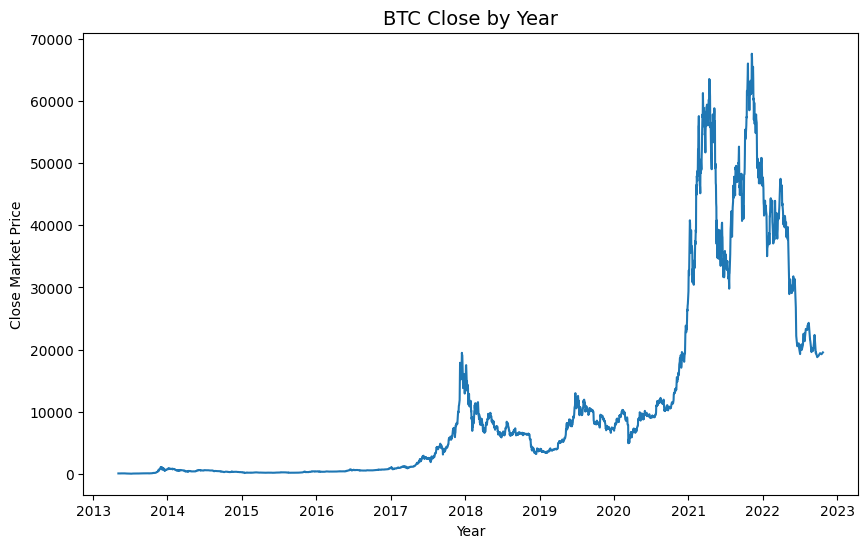

In [34]:
# Plot btc 'close' column
plt.figure(figsize=(10,6))
plt.title('BTC Close by Year', fontsize=14)
plt.ylabel('Close Market Price')
plt.xlabel('Year')
plt.plot(btc['close'])

NEWS: Primo grafico delle notizie con un word frequenci count a grafico a palle

In [51]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 168 kB 4.2 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


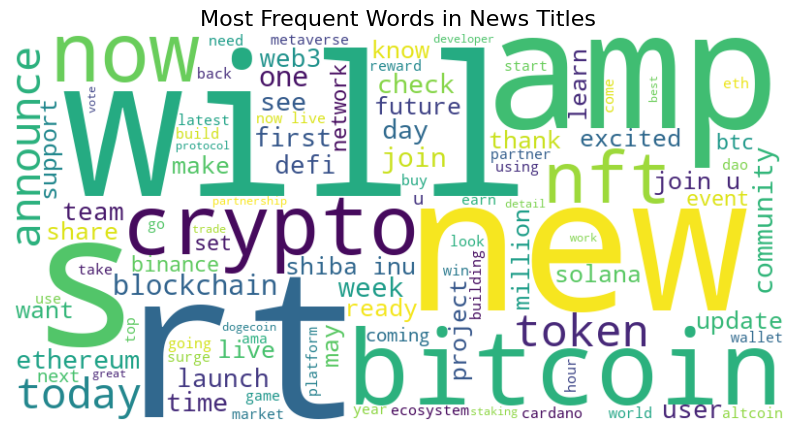

In [104]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combina tutti i titoli in un unico testo
text = " ".join(title for title in news_data['title'].dropna().str.lower())

# Genera la Word Cloud
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    colormap='viridis',  # Cambia la palette di colori
    max_words=100  # Numero massimo di parole da visualizzare
).generate(text)

# Visualizza la Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Nascondi gli assi
plt.title("Most Frequent Words in News Titles", fontsize=16)
plt.show()

In [110]:
crypto_names_tickers = [
    'Bitcoin', 'BTC',
    'Ethereum', 'ETH',
    'Binance Coin', 'BNB',
    'Tether', 'USDT',
    'Solana', 'SOL',
    'Cardano', 'ADA',
    'Ripple', 'XRP',
    'Polkadot', 'DOT',
    'Dogecoin', 'DOGE',
    'Shiba Inu', 'SHIB',
    'Litecoin', 'LTC',
    'Tron', 'TRX',
    'Avalanche', 'AVAX',
    'Chainlink', 'LINK',
    'Cosmos', 'ATOM',
    'Uniswap', 'UNI',
    'Aave', 'AAVE',
    'Wrapped Bitcoin', 'WBTC',
    'Tezos', 'XTZ',
    'Theta Network', 'THETA',
    'Stellar Lumens', 'XLM',
    'VeChain', 'VET',
    'Monero', 'XMR',
    'PancakeSwap', 'CAKE',
    'Algorand', 'ALGO',
    'Axie Infinity', 'AXS',
    'Decentraland', 'MANA',
    'The Sandbox', 'SAND',
    'Elrond', 'EGLD',
    'Zcash', 'ZEC',
    'Maker', 'MKR',
    'Dash', 'DASH',
    'Neo', 'NEO',
    'IOTA', 'MIOTA',
    'Enjin Coin', 'ENJ',
    'Filecoin', 'FIL',
    'Chiliz', 'CHZ',
    'Quant', 'QNT',
    'Fantom', 'FTM',
    'Gala', 'GALA',
    'Klaytn', 'KLAY',
    'Aptos', 'APT',
    'Immutable X', 'IMX',
    'Optimism', 'OP',
    'Curve DAO Token', 'CRV',
    'Convex Finance', 'CVX',
    'GMX', 'GMX',
    'Stacks', 'STX',
    'Render Token', 'RNDR',
    'Arweave', 'AR',
    'Loopring', 'LRC',
    '1inch', '1INCH',
    'Balancer', 'BAL',
    'Harmony', 'ONE',
    'Synthetix', 'SNX',
    'Helium', 'HNT',
    'Kava', 'KAVA',
    'Celo', 'CELO',
    'Flow', 'FLOW',
    'Ocean Protocol', 'OCEAN',
    'Serum', 'SRM',
    'Stramr', 'DATA'
]

In [111]:
casual_words = [
    'the',
    'a',
    'in',
    'per',
    'rt',
    'on',
    'for',
    'of',
    'is',
    'to',
    'and',
    'with',
    'you',
    'are',
    'we',
    'as',
    'our',
    'this',
    'will',
    'at',
    'be',
    'your',
    'by',
    'from',
    '-',
    'has',
    'that',
    'have',
    '&amp;',
    'can',
    'it',
    'an',
    'about',
    'how',
    'us',
    'get',
    'what',
    'been',
    'we\'re',
    'here',
    'than',
    '',    
]

In [112]:
# Funzione per classificare parole
def categorize_word(word, crypto_list):
    return "useless-words" if word in casual_words else "crypto"

# Prepara la lista dei titoli in formato tokenizzato
corpus = news_data['title'].dropna().str.lower()
tokenized_titles = corpus.str.split()
tokenized_titles

# Crea due liste: parole correlate e non correlate
crypto_words = []
non_crypto_words = []

for title in tokenized_titles:
    for word in title:
        if categorize_word(word, casual_words) == "useless-words":
            non_crypto_words.append(word)
        else:
            crypto_words.append(word)

# Conteggio delle parole per ogni categoria
from collections import Counter
crypto_word_counts = Counter(crypto_words)
non_crypto_word_counts = Counter(non_crypto_words)

print("Crypto Words:", crypto_word_counts.most_common(50))
print("Other Words:", non_crypto_word_counts.most_common(100))

Crypto Words: [('new', 11687), ('crypto', 10681), ('now', 9256), ('bitcoin', 8477), ('price', 8055), ('more', 6052), ('join', 5688), ('all', 5355), ('️', 5294), ('up', 5178), ('out', 5165), ('top', 4665), ('market', 4619), ('ethereum', 4408), ('community', 4280), ('token', 3956), ('live', 3877), ('just', 3861), ('over', 3785), ('first', 3766), ('one', 3656), ('blockchain', 3504), ('network', 3298), ('its', 3200), ('if', 3190), ('next', 3181), ('million', 3175), ('trading', 3157), ('into', 3139), ('after', 3118), ('last', 3058), ('week', 3046), ('why', 3024), ('nft', 2997), ('announce', 2822), ('–', 2813), ('cardano', 2813), ('launch', 2806), ('check', 2780), ('i', 2776), ('time', 2760), ('but', 2724), ('xrp', 2628), ('solana', 2615), ('not', 2565), ('may', 2504), ('team', 2464), ('their', 2436), ('tokens', 2418), ('some', 2399)]
Other Words: [('the', 82714), ('to', 67608), ('rt', 38057), ('and', 37339), ('of', 35465), ('in', 34477), ('a', 33450), ('on', 32624), ('is', 31511), ('for', 3

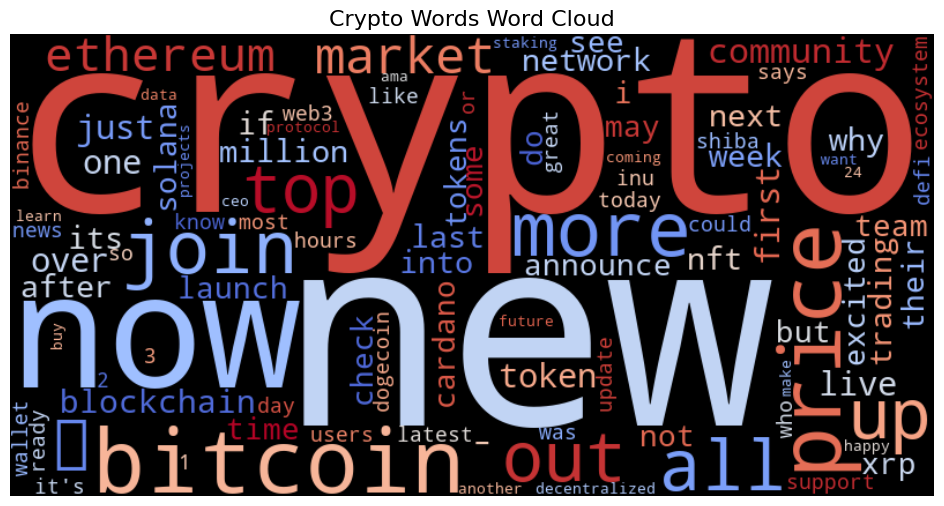

In [113]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convertire i conteggi delle parole crypto in un dizionario
crypto_word_freq = dict(crypto_word_counts)

# Generare la Word Cloud
crypto_wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='black', 
    colormap='coolwarm',  # Tavolozza colori
    max_words=100  # Limita alle 100 parole più frequenti
).generate_from_frequencies(crypto_word_freq)

# Visualizzare la Word Cloud
plt.figure(figsize=(12, 6))
plt.imshow(crypto_wordcloud, interpolation='bilinear')
plt.axis('off')  # Rimuovere gli assi
plt.title("Crypto Words Word Cloud", fontsize=16)
plt.show()

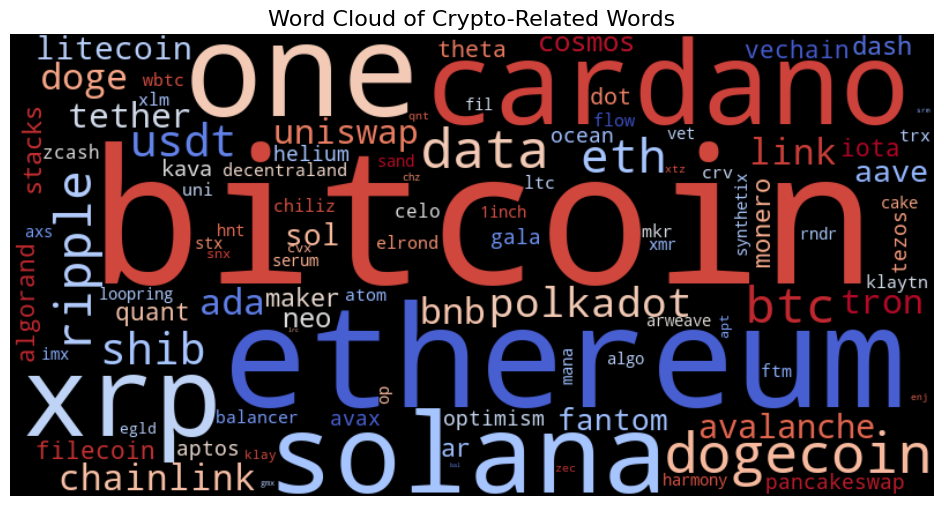

In [115]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# Prepara la lista delle parole crypto (converti in lowercase per confronti case-insensitive)
crypto_names_tickers_lower = [name.lower() for name in crypto_names_tickers]

# Filtra i titoli per includere solo parole presenti nella lista delle criptovalute
crypto_only_words = []

for title in tokenized_titles:
    for word in title:
        if word in crypto_names_tickers_lower:  # Controlla se è nella lista
            crypto_only_words.append(word)

# Conta la frequenza delle parole crypto
crypto_word_counts = Counter(crypto_only_words)

# Genera la Word Cloud
crypto_wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='black',
    colormap='coolwarm',
    max_words=100
).generate_from_frequencies(crypto_word_counts)

# Visualizza la Word Cloud
plt.figure(figsize=(12, 6))
plt.imshow(crypto_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Crypto-Related Words", fontsize=16)
plt.show()

In [ ]:
# Creare una colonna con le date normalizzate nel dataset del Bitcoin
btc['date_normal'] = btc.index.date

# Eseguire un INNER JOIN tra i due dataset
btc_with_news = btc.merge(news_per_day, left_on='date_normal', right_index=True, how='inner')

# Verifica delle prime righe del dataset unito
print(btc_with_news[['close', 'daily_return', 'news_count', 'impatto']])

                   close  daily_return  news_count  impatto
date                                                       
2017-09-23   3792.399902      4.453685           1        3
2017-09-29   4163.069824     -0.279303           1        0
2017-10-17   5605.509766     -2.097253           1        2
2017-10-31   6468.399902      5.511271           2        1
2017-11-09   7143.580078     -4.237574           1       -3
...                  ...           ...         ...      ...
2022-09-25  18802.097976     -3.796697          25       19
2022-10-02  19044.107272      1.287140          24       49
2022-10-09  19446.426194      2.112564          21       37
2022-10-16  19268.092801     -0.917050          15      274
2022-10-23  19567.007398      1.551345          14       76

[1086 rows x 4 columns]


Passo 2: Calcolo della Volatilità e Identificazione dei Cambi Significativi nel Prezzo
	•	Obiettivo: Aggiungere al dataset del prezzo:
	1.	Il rendimento giornaliero (daily_return).
	2.	La volatilità calcolata su una finestra di 3 giorni (volatility_3d).
	3.	Una colonna per identificare i cambi significativi nel prezzo (significant_change).


In [25]:
# Filtrare il dataset per "Bitcoin"
btc = df.loc[df['crypto_name'] == 'Bitcoin'].copy()

# Impostare l'indice temporale
btc = btc.set_index('date')
btc.index = pd.to_datetime(btc.index)

# Verifica del dataset filtrato
print(btc.columns())

# Calcolo del rendimento giornaliero (daily return)
btc['daily_return'] = btc['close'].pct_change() * 100

# Calcolo della volatilità a 3 giorni
btc['volatility_3d'] = btc['daily_return'].rolling(window=3).std()

# Soglia per i cambi significativi (ad esempio, 2 volte la deviazione standard)
threshold = 2 * btc['daily_return'].std()
btc['significant_change'] = btc['daily_return'].abs() > threshold

# Verifica del dataset aggiornato
print(btc[['close', 'daily_return', 'volatility_3d', 'significant_change']].head(10))

KeyError: "None of ['date'] are in the columns"

Passo 3: Calcolo delle Metriche

Riproponiamo i calcoli per aggiungere le colonne necessarie al dataset:

In [19]:
# Calcolo del rendimento giornaliero (daily return)
btc['daily_return'] = btc['close'].pct_change() * 100

# Calcolo della volatilità a 3 giorni
btc['volatility_3d'] = btc['daily_return'].rolling(window=3).std()

# Soglia per i cambi significativi (es., 2 volte la deviazione standard)
threshold = 3 * btc['daily_return'].std()
btc['significant_change'] = btc['daily_return'].abs() > threshold

# Verifica delle prime righe del dataset aggiornato
print(btc[['close', 'daily_return', 'volatility_3d', 'significant_change']].head(10))

                 close  daily_return  volatility_3d  significant_change
date                                                                   
2013-05-05  115.910004           NaN            NaN               False
2013-05-06  112.300003     -3.114486            NaN               False
2013-05-07  111.500000     -0.712380            NaN               False
2013-05-08  113.566002      1.852916       2.484148               False
2013-05-09  112.669998     -0.788972       1.503673               False
2013-05-10  117.199997      4.020590       2.408674               False
2013-05-11  115.242996     -1.669796       3.062902               False
2013-05-12  115.000000     -0.210856       2.955620               False
2013-05-13  117.980003      2.591307       2.165549               False
2013-05-14  111.500000     -5.492459       4.104768               False


Passo 4: Visualizzazione del Prezzo e dei Cambi Significativi

Per avere una panoramica chiara, visualizziamo il prezzo del Bitcoin nel tempo con i cambi significativi evidenziati:

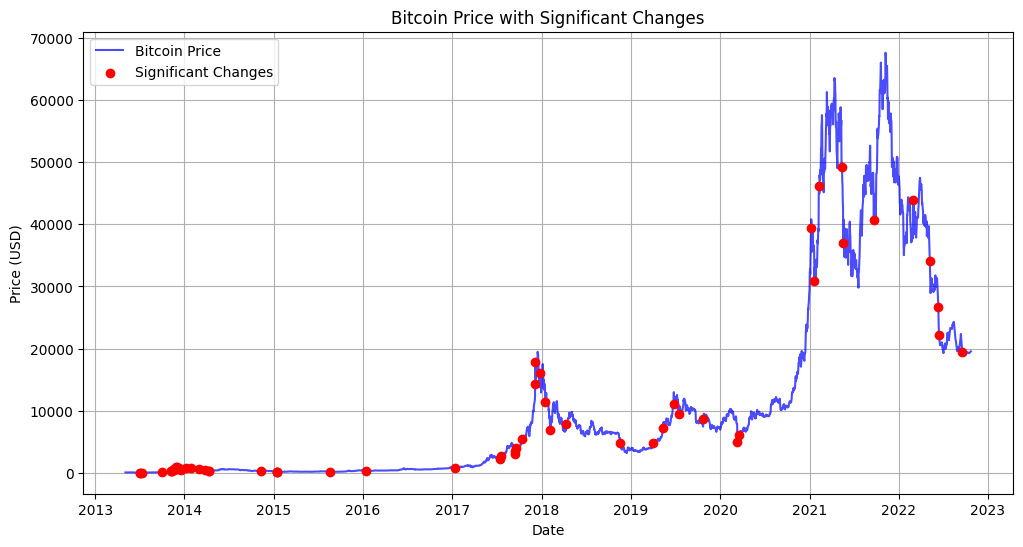

In [20]:
import matplotlib.pyplot as plt

# Grafico del prezzo con cambi significativi
plt.figure(figsize=(12, 6))
plt.plot(btc.index, btc['close'], label='Bitcoin Price', color='blue', alpha=0.7)
plt.scatter(btc[btc['significant_change']].index, btc[btc['significant_change']]['close'], 
            color='red', label='Significant Changes', zorder=5)

plt.title('Bitcoin Price with Significant Changes')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

Impatto = (Positivo - Negativo) × Importanza

In [21]:
# Creazione della colonna "Impatto"
news_data['impatto'] = (news_data['positive'] - news_data['negative']) * news_data['important']

# Verifica delle prime righe
print(news_data[['date', 'positive', 'negative', 'important', 'impatto']].head())

            date  positive  negative  important  impatto
0  6/9/2022 6:57         0         0          0        0
1  6/9/2022 6:03         0         0          0        0
2  6/9/2022 5:39         0         1          1       -1
3  6/9/2022 5:32         0         0          0        0
4  6/9/2022 5:28         1         0          0        0


Passo 6: Aggregazione Giornaliere

Obiettivo: Raggruppare le notizie per giorno per ottenere:
	1.	Somma dell’impatto giornaliero.
	2.	Numero di notizie pubblicate.

In [22]:
# Raggruppare le notizie per giorno
news_per_day = news_data.groupby(news_data['timestamp'].dt.date).agg({
    'impatto': 'sum',       # Somma dell'impatto giornaliero
    'id': 'count'           # Conteggio del numero di notizie
}).rename(columns={'id': 'news_count'})

# Verifica dei risultati
print(news_per_day.head())

            impatto  news_count
timestamp                      
2017-09-23        3           1
2017-09-29        0           1
2017-10-17        2           1
2017-10-31        1           2
2017-11-09       -3           1


Passo 7: Unione dei Dataset

Obiettivo: Unire il dataset del Bitcoin (btc) con quello delle notizie (news_per_day) per analizzare la relazione tra impatto delle notizie e variazioni del prezzo.

In [23]:
# Creare una colonna con le date normalizzate nel dataset del Bitcoin
btc['date_normal'] = btc.index.date

# Unire i due dataset
btc_with_news = btc.merge(news_per_day, left_on='date_normal', right_index=True, how='left')

# Verifica delle prime righe del dataset unito
print(btc_with_news[['close', 'daily_return', 'news_count', 'impatto']].head())

                 close  daily_return  news_count  impatto
date                                                     
2013-05-05  115.910004           NaN         NaN      NaN
2013-05-06  112.300003     -3.114486         NaN      NaN
2013-05-07  111.500000     -0.712380         NaN      NaN
2013-05-08  113.566002      1.852916         NaN      NaN
2013-05-09  112.669998     -0.788972         NaN      NaN


Passo 8: Analisi Correlativa

Obiettivo: Verificare la correlazione tra:
	•	Numero di notizie e variazioni giornaliere del prezzo.
	•	Impatto delle notizie e variazioni giornaliere del prezzo.


se vogliamo concentrarci solo sulle date in cui entrambi i dataset hanno dati, dovremmo usare un inner join. Questo approccio è utile per evitare di elaborare date prive di notizie o di dati sul prezzo.
Perché Usare un Inner Join

	1.	Riduzione del Noise:
	•	Evitiamo giorni senza notizie, che non contribuiscono all’analisi dell’impatto delle notizie.
	•	Escludiamo giorni senza prezzi, che renderebbero impossibile l’analisi delle variazioni di prezzo.
	2.	Concentrazione sui Dati Rilevanti:
	•	Ci focalizziamo solo sulle date comuni ai due dataset.

In [31]:
# Creare una colonna con le date normalizzate nel dataset del Bitcoin
btc['date_normal'] = btc.index.date

# Eseguire un INNER JOIN tra i due dataset
btc_with_news = btc.merge(news_per_day, left_on='date_normal', right_index=True, how='inner')

# Verifica delle prime righe del dataset unito
print(btc_with_news[['close', 'daily_return', 'news_count', 'impatto']])

                   close  daily_return  news_count  impatto
date                                                       
2017-09-23   3792.399902      4.453685           1        3
2017-09-29   4163.069824     -0.279303           1        0
2017-10-17   5605.509766     -2.097253           1        2
2017-10-31   6468.399902      5.511271           2        1
2017-11-09   7143.580078     -4.237574           1       -3
...                  ...           ...         ...      ...
2022-09-25  18802.097976     -3.796697          25       19
2022-10-02  19044.107272      1.287140          24       49
2022-10-09  19446.426194      2.112564          21       37
2022-10-16  19268.092801     -0.917050          15      274
2022-10-23  19567.007398      1.551345          14       76

[1086 rows x 4 columns]


Passo 9: Visualizzazioni

1. Numero di Notizie per Giorno

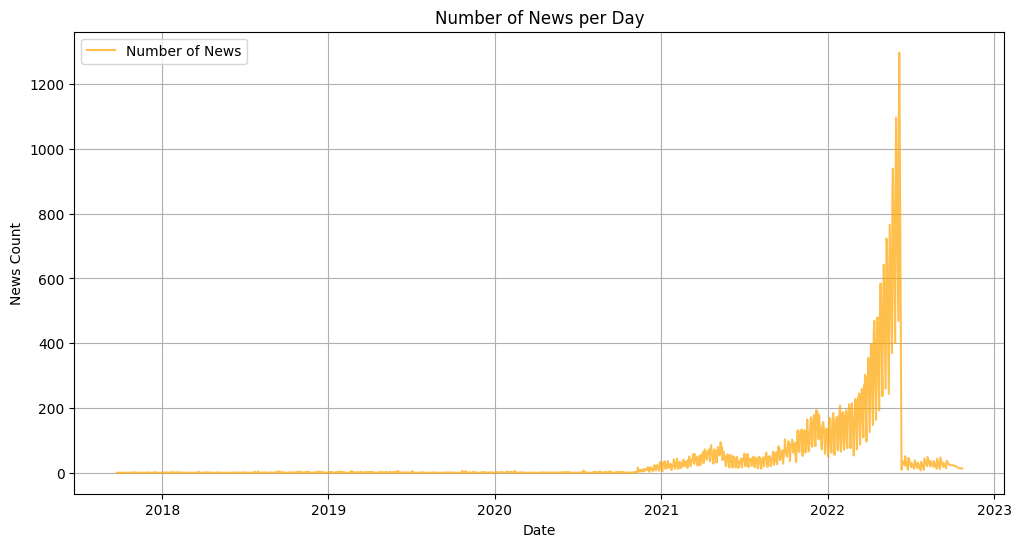

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(btc_with_news.index, btc_with_news['news_count'], label='Number of News', color='orange', alpha=0.7)
plt.title('Number of News per Day')
plt.xlabel('Date')
plt.ylabel('News Count')
plt.legend()
plt.grid()
plt.show()

2. Impatto delle Notizie e Prezzo

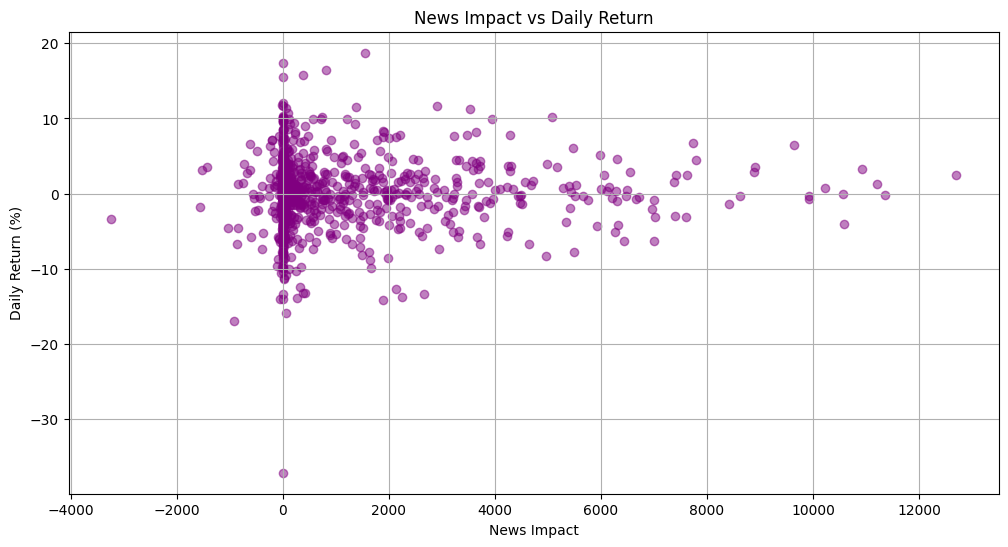

In [26]:
plt.figure(figsize=(12, 6))
plt.scatter(btc_with_news['impatto'], btc_with_news['daily_return'], alpha=0.5, color='purple')
plt.title('News Impact vs Daily Return')
plt.xlabel('News Impact')
plt.ylabel('Daily Return (%)')
plt.grid()
plt.show()

3. Notizie Estreme e Prezzo

Filtriamo i giorni con impatto estremamente positivo o negativo per analizzare separatamente i casi estremi.

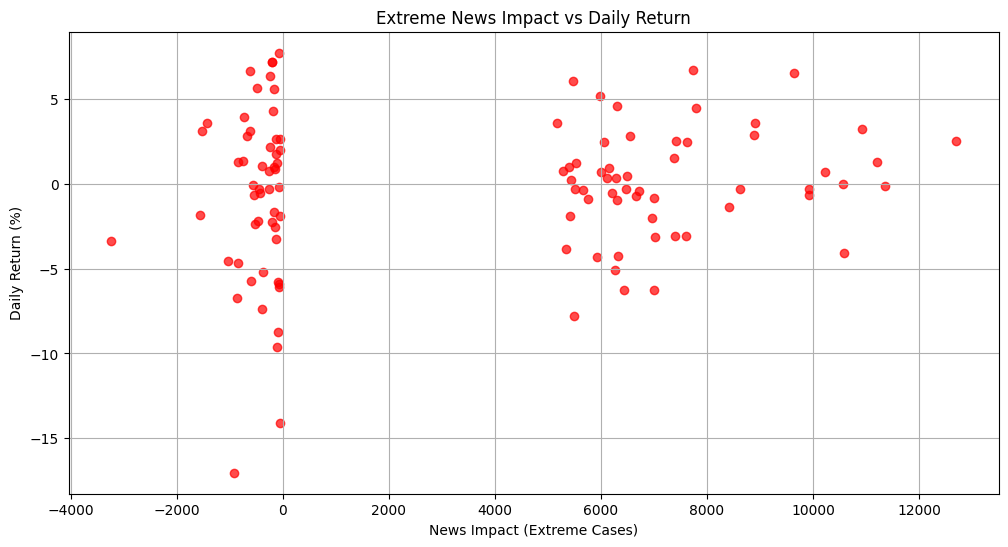

In [30]:
# Filtrare notizie con impatto estremo (es. sopra il 95° percentile o sotto il 5° percentile)
positive_threshold = btc_with_news['impatto'].quantile(0.95)
negative_threshold = btc_with_news['impatto'].quantile(0.05)

extreme_news = btc_with_news[
    (btc_with_news['impatto'] > positive_threshold) |
    (btc_with_news['impatto'] < negative_threshold)
]

# Scatter plot dei casi estremi
plt.figure(figsize=(12, 6))
plt.scatter(extreme_news['impatto'], extreme_news['daily_return'], color='red', alpha=0.7)
plt.title('Extreme News Impact vs Daily Return')
plt.xlabel('News Impact (Extreme Cases)')
plt.ylabel('Daily Return (%)')
plt.grid()
plt.show()